<a href="https://colab.research.google.com/github/sashini472/Datathon-2/blob/main/Datathon%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the Necessary Libraries**

In [ ]:
# Python setup
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
import io

warnings.filterwarnings('ignore')

**Load the Data**

In [ ]:
# Upload the file
uploaded = files.upload()

Saving Mortality Dataset.csv to Mortality Dataset (3).csv


In [ ]:
# We have already uploaded the dataset
data = pd.read_csv('Mortality Dataset.csv')

In [ ]:
# Display the first few rows of the dataset to ensure it's loaded correctly
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Explore the Data**

In [ ]:
# Summary statistics
description = data.describe()
description

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# Check for missing values
print(data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Explore Individual Variables**

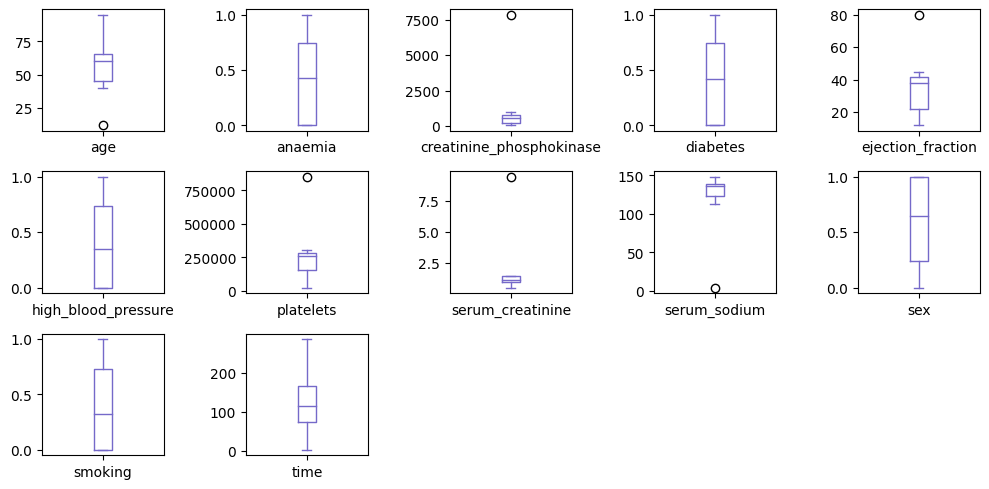

In [ ]:
# Visual representation of data.describe()
# Drop the 'count' row for better visualization
description = description.drop('count')
description = description.drop('DEATH_EVENT', axis=1)

# Visual representation of data.describe()
description.plot(kind='box', subplots=True, layout=(3, 5), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

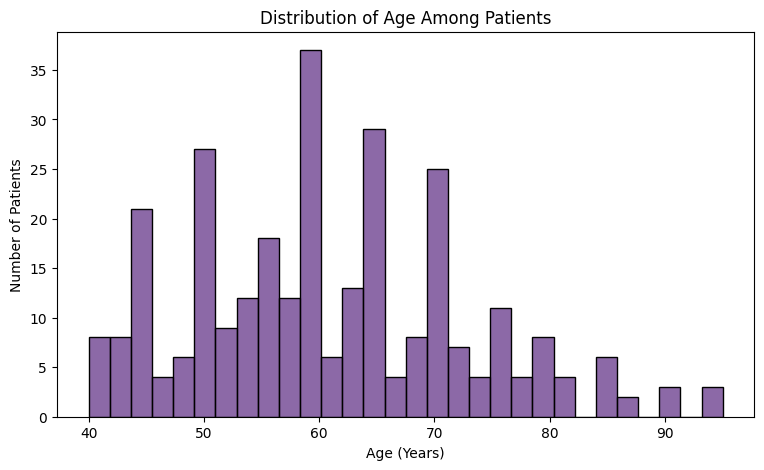

In [ ]:
# Create a histogram for the 'Age' feature
plt.figure(figsize=(9, 5))
sns.histplot(data['age'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Age Among Patients')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Patients')
plt.show()

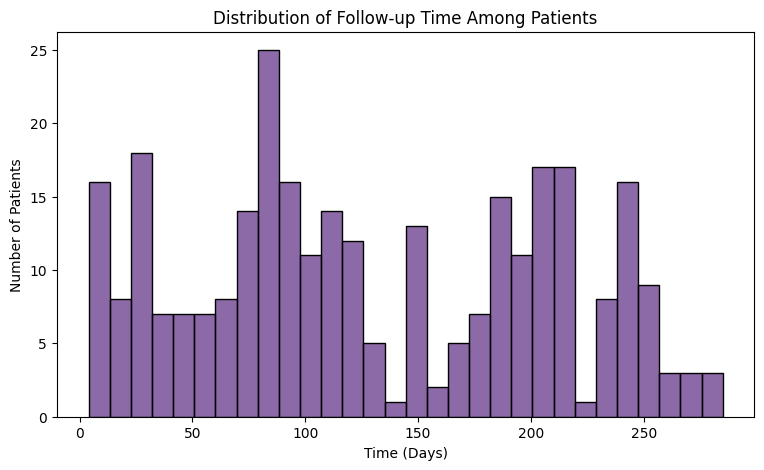

In [ ]:
# Create a histogram for the 'Time' feature
plt.figure(figsize=(9, 5))
sns.histplot(data['time'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Follow-up Time Among Patients')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Patients')
plt.show()

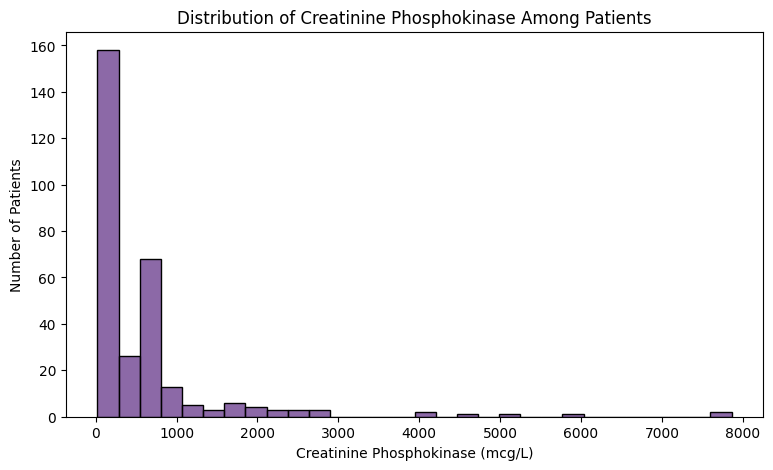

In [ ]:
# Create a histogram for the 'creatinine_phosphokinase' feature
plt.figure(figsize=(9, 5))
sns.histplot(data['creatinine_phosphokinase'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Creatinine Phosphokinase Among Patients')
plt.xlabel('Creatinine Phosphokinase (mcg/L)')
plt.ylabel('Number of Patients')
plt.show()

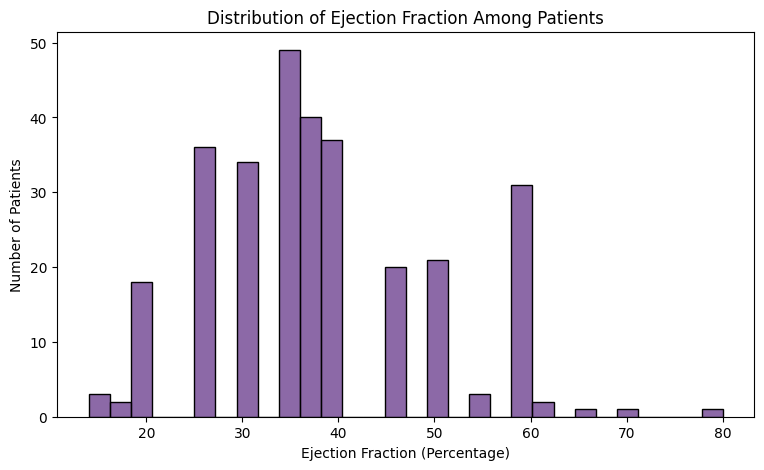

In [ ]:
# Create a histogram for the 'ejection_fraction' feature
plt.figure(figsize=(9, 5))
sns.histplot(data['ejection_fraction'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Ejection Fraction Among Patients')
plt.xlabel('Ejection Fraction (Percentage)')
plt.ylabel('Number of Patients')
plt.show()

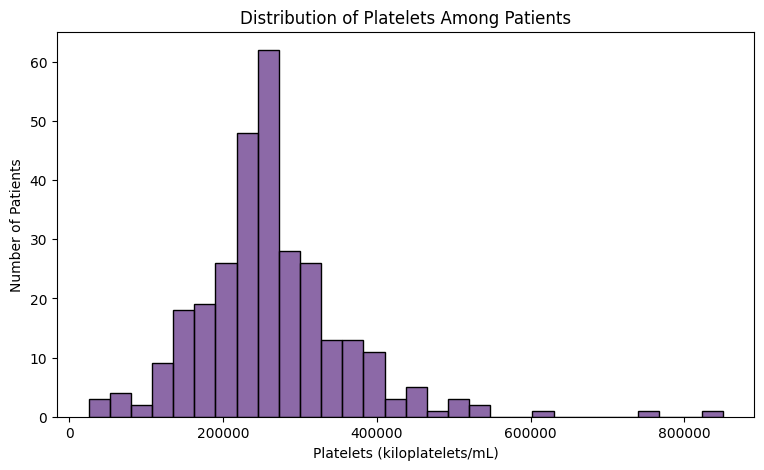

In [ ]:
# Create a histogram for the 'platelets' feature
plt.figure(figsize=(9, 5))
sns.histplot(data['platelets'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Platelets Among Patients')
plt.xlabel('Platelets (kiloplatelets/mL)')
plt.ylabel('Number of Patients')
plt.show()

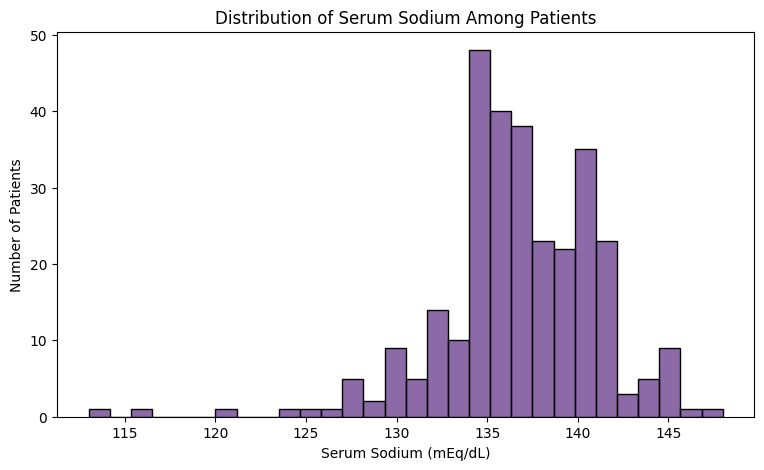

In [ ]:
# Create a histogram for the 'serum_sodium' feature
plt.figure(figsize=(9, 5))
sns.histplot(data['serum_sodium'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Serum Sodium Among Patients')
plt.xlabel('Serum Sodium (mEq/dL)')
plt.ylabel('Number of Patients')
plt.show()

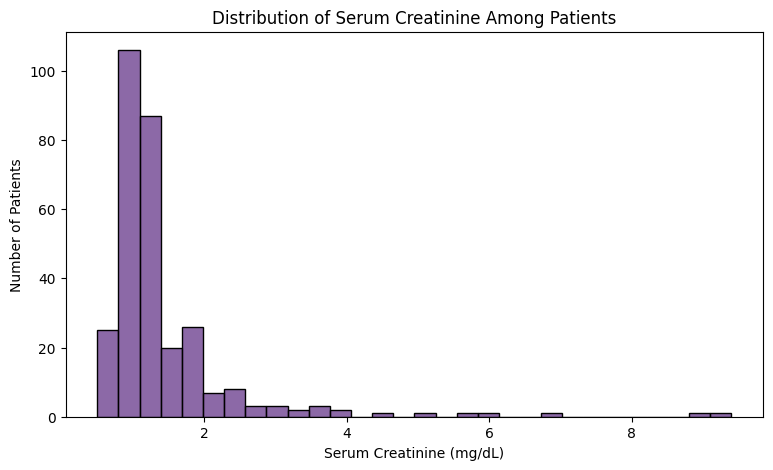

In [ ]:
# Create a histogram for the 'serum_creatinine' feature
plt.figure(figsize=(9, 5))
sns.histplot(data['serum_creatinine'], bins=30, kde=False, color='#66378a')
plt.title('Distribution of Serum Creatinine Among Patients')
plt.xlabel('Serum Creatinine (mg/dL)')
plt.ylabel('Number of Patients')
plt.show()

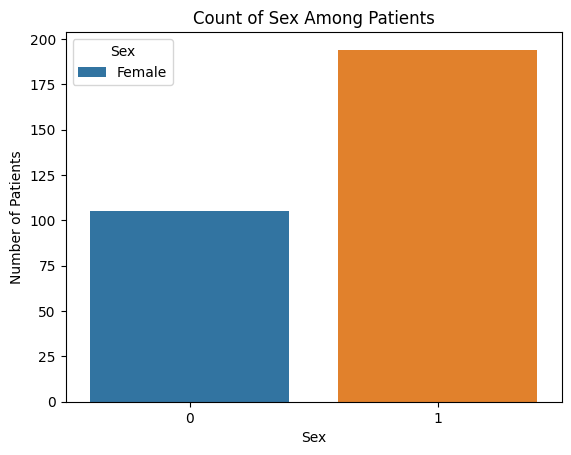

In [ ]:
# Create a count plot for the 'sex' feature
sns.countplot(x = 'sex', data = data)
plt.title('Count of Sex Among Patients')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

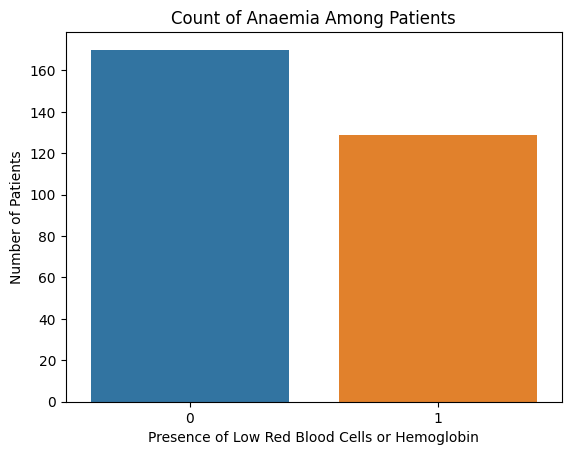

In [ ]:
# Create a count plot for the 'anaemia' feature
sns.countplot(x = 'anaemia', data = data)
plt.title('Count of Anaemia Among Patients')
plt.xlabel('Presence of Low Red Blood Cells or Hemoglobin')
plt.ylabel('Number of Patients')
plt.show()

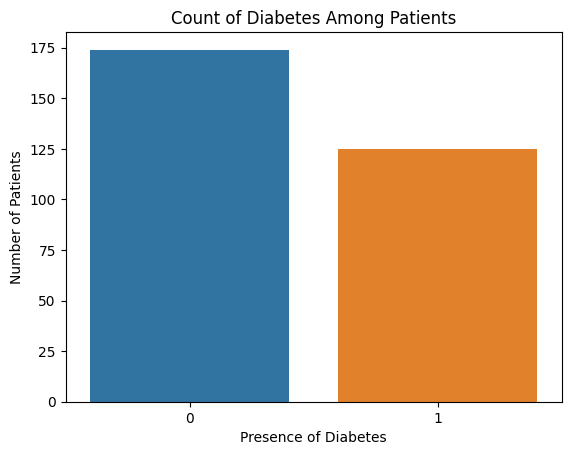

In [ ]:
# Create a count plot for the 'diabetes' feature
sns.countplot(x = 'diabetes', data = data)
plt.title('Count of Diabetes Among Patients')
plt.xlabel('Presence of Diabetes')
plt.ylabel('Number of Patients')
plt.show()

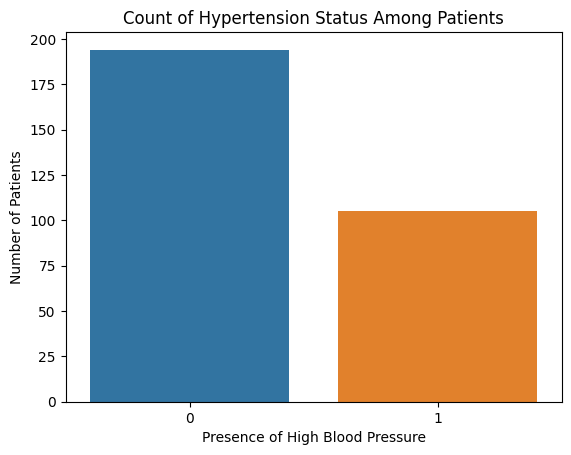

In [ ]:
# Create a count plot for the 'high blood pressure' feature
sns.countplot(x = 'high_blood_pressure', data = data)
plt.title('Count of Hypertension Status Among Patients')
plt.xlabel('Presence of High Blood Pressure')
plt.ylabel('Number of Patients')
plt.show()

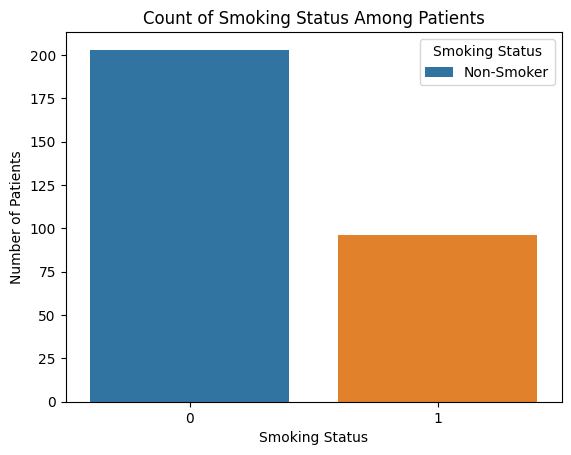

In [ ]:
# Create a count plot for the 'smoking' feature
sns.countplot(x = 'smoking', data = data)
plt.title('Count of Smoking Status Among Patients')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Patients')
plt.legend(title='Smoking Status', labels=['Non-Smoker', 'Smoker'])
plt.show()

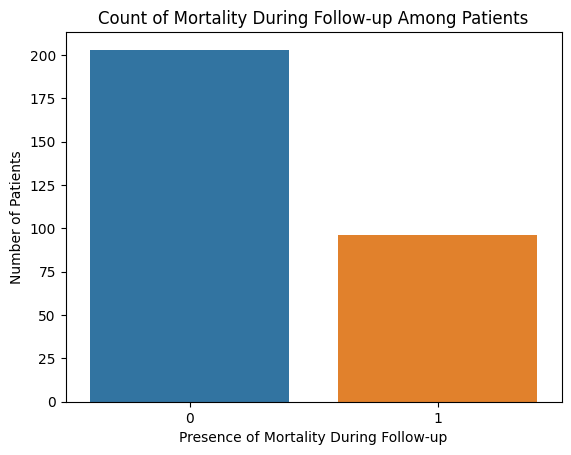

In [ ]:
# Create a count plot for the 'mortality' feature
sns.countplot(x = 'DEATH_EVENT', data = data)
plt.title('Count of Mortality During Follow-up Among Patients')
plt.xlabel('Presence of Mortality During Follow-up')
plt.ylabel('Number of Patients')
plt.show()

**Explore the Relationship Between Two or More Variables**

<Axes: >

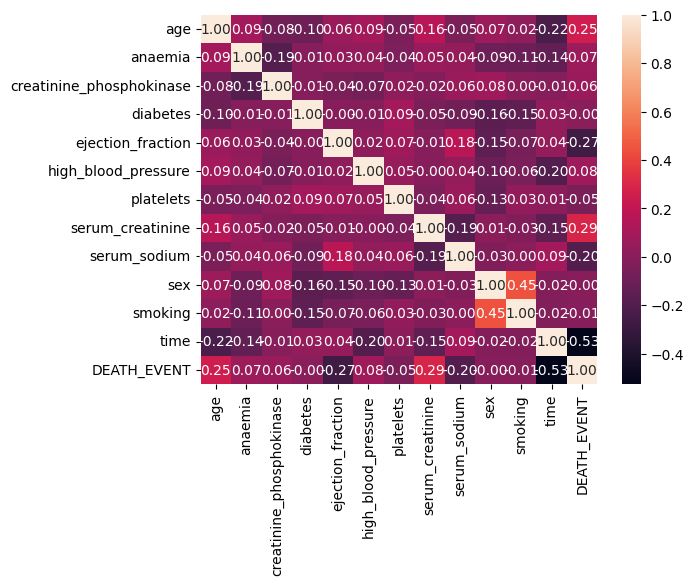

In [ ]:
# Correlation matrix to quantify relationships
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

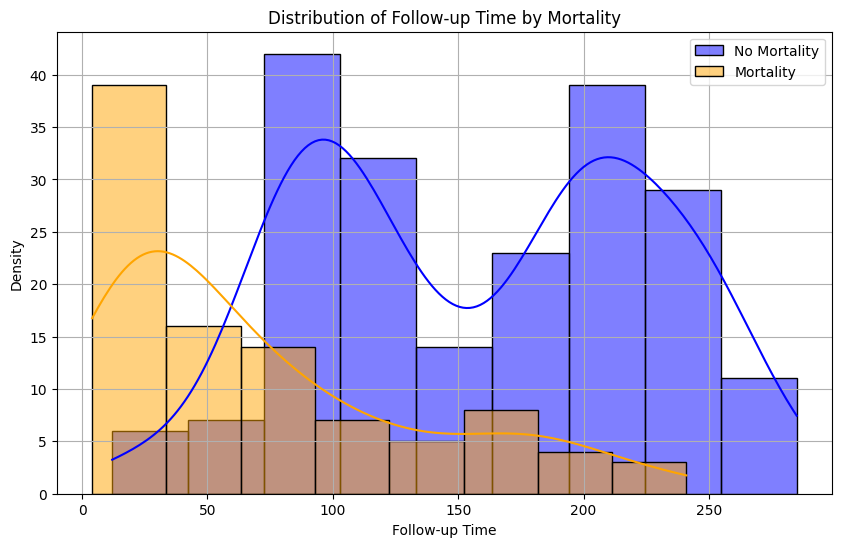

In [ ]:
# Create a histogram or density plot for each category of the binary variable
plt.figure(figsize=(10, 6))

# Separate data by binary category
category_0 = data[data['DEATH_EVENT'] == 0]
category_1 = data[data['DEATH_EVENT'] == 1]

# Create a histogram or density plot for Category 0
sns.histplot(category_0['time'], kde=True, label='No Mortality', color='blue')

# Create a histogram or density plot for Category 1
sns.histplot(category_1['time'], kde=True, label='Mortality', color='orange')

# Add labels, title, legend, etc.
plt.xlabel('Follow-up Time')
plt.ylabel('Density')
plt.title('Distribution of Follow-up Time by Mortality')
plt.legend()
plt.grid(True)

# Show the plots
plt.show()

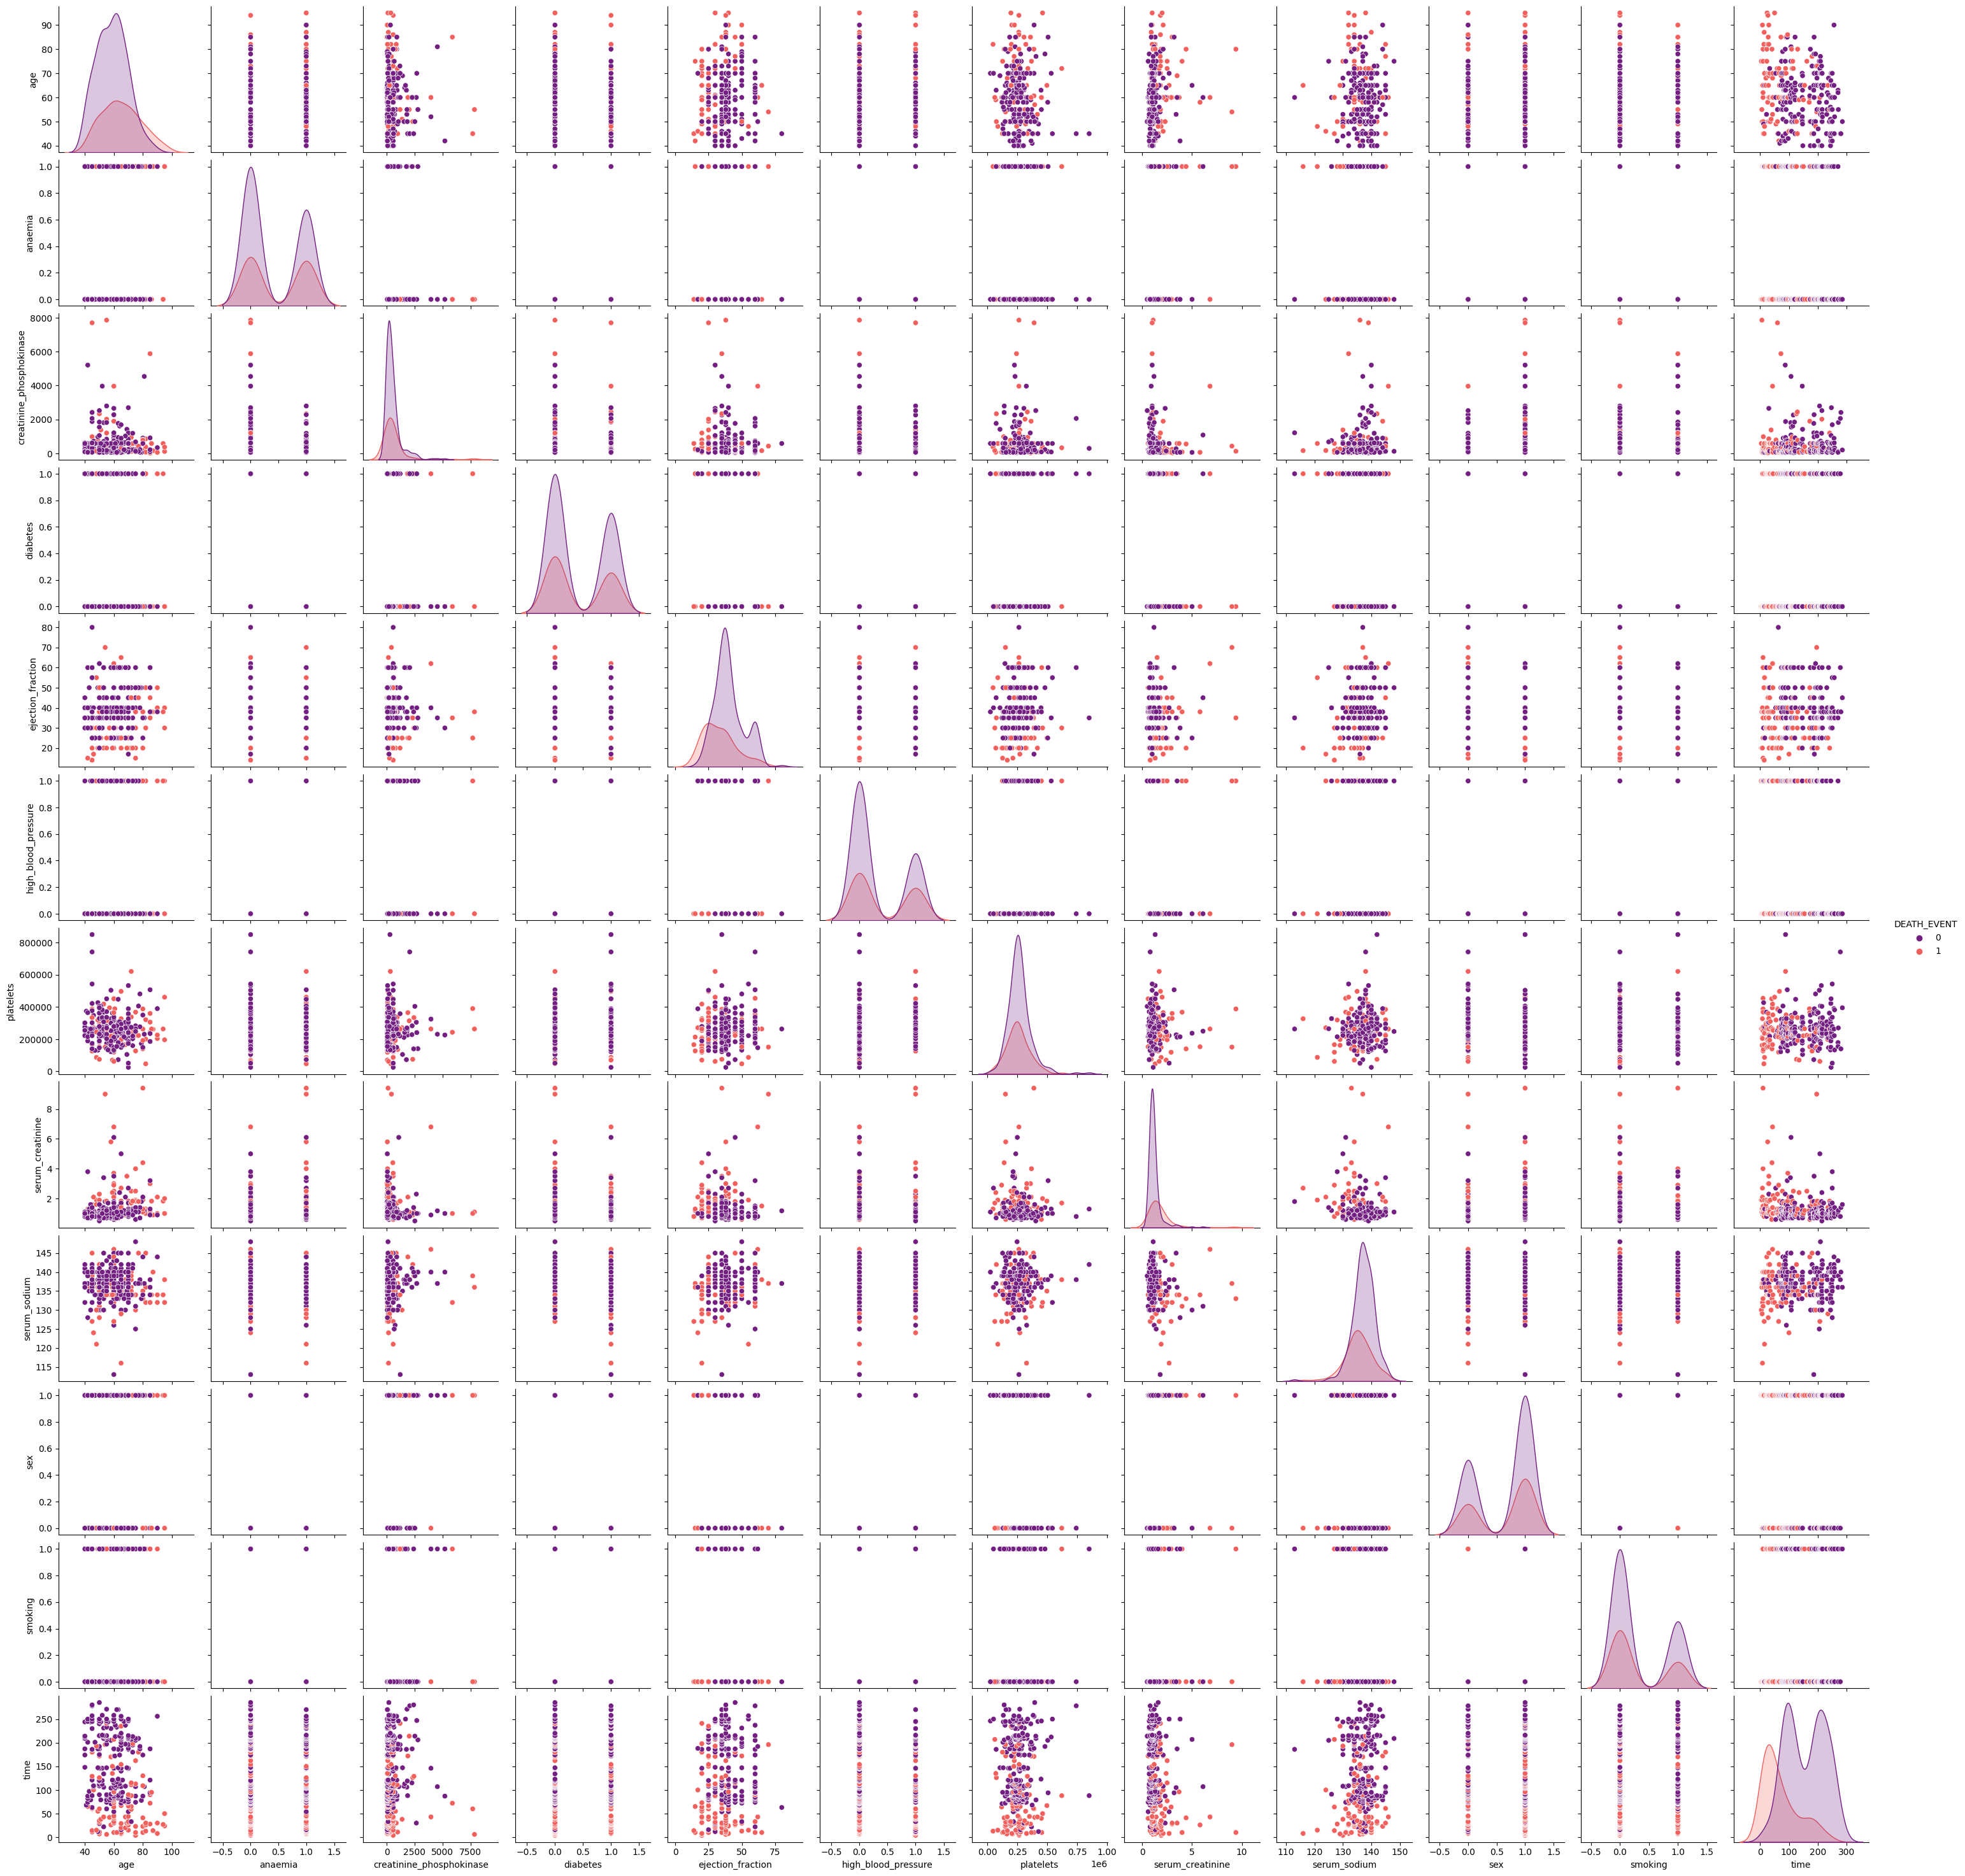

In [ ]:
# Display pair plot for data visualization
sns.pairplot(data, hue='DEATH_EVENT', palette="magma")
plt.show()

**Preparing the Data**


In [ ]:
# Split the data into features and target variable
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Building the Logistic Regression Model (+ Some Terminologies)**

In [ ]:
# Training logistic regression model #use the newton-cg solver
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[33  2]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60



**Visualizing the Results**

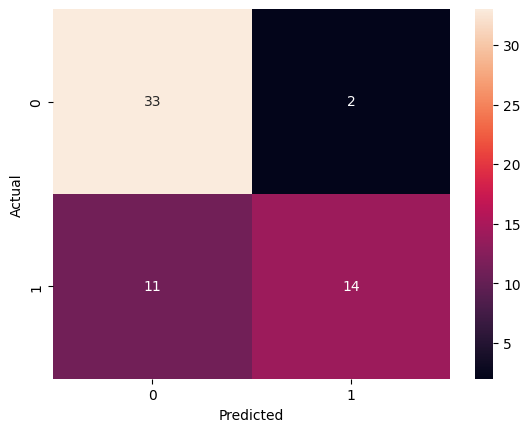

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Creating a logistic Regression Object**

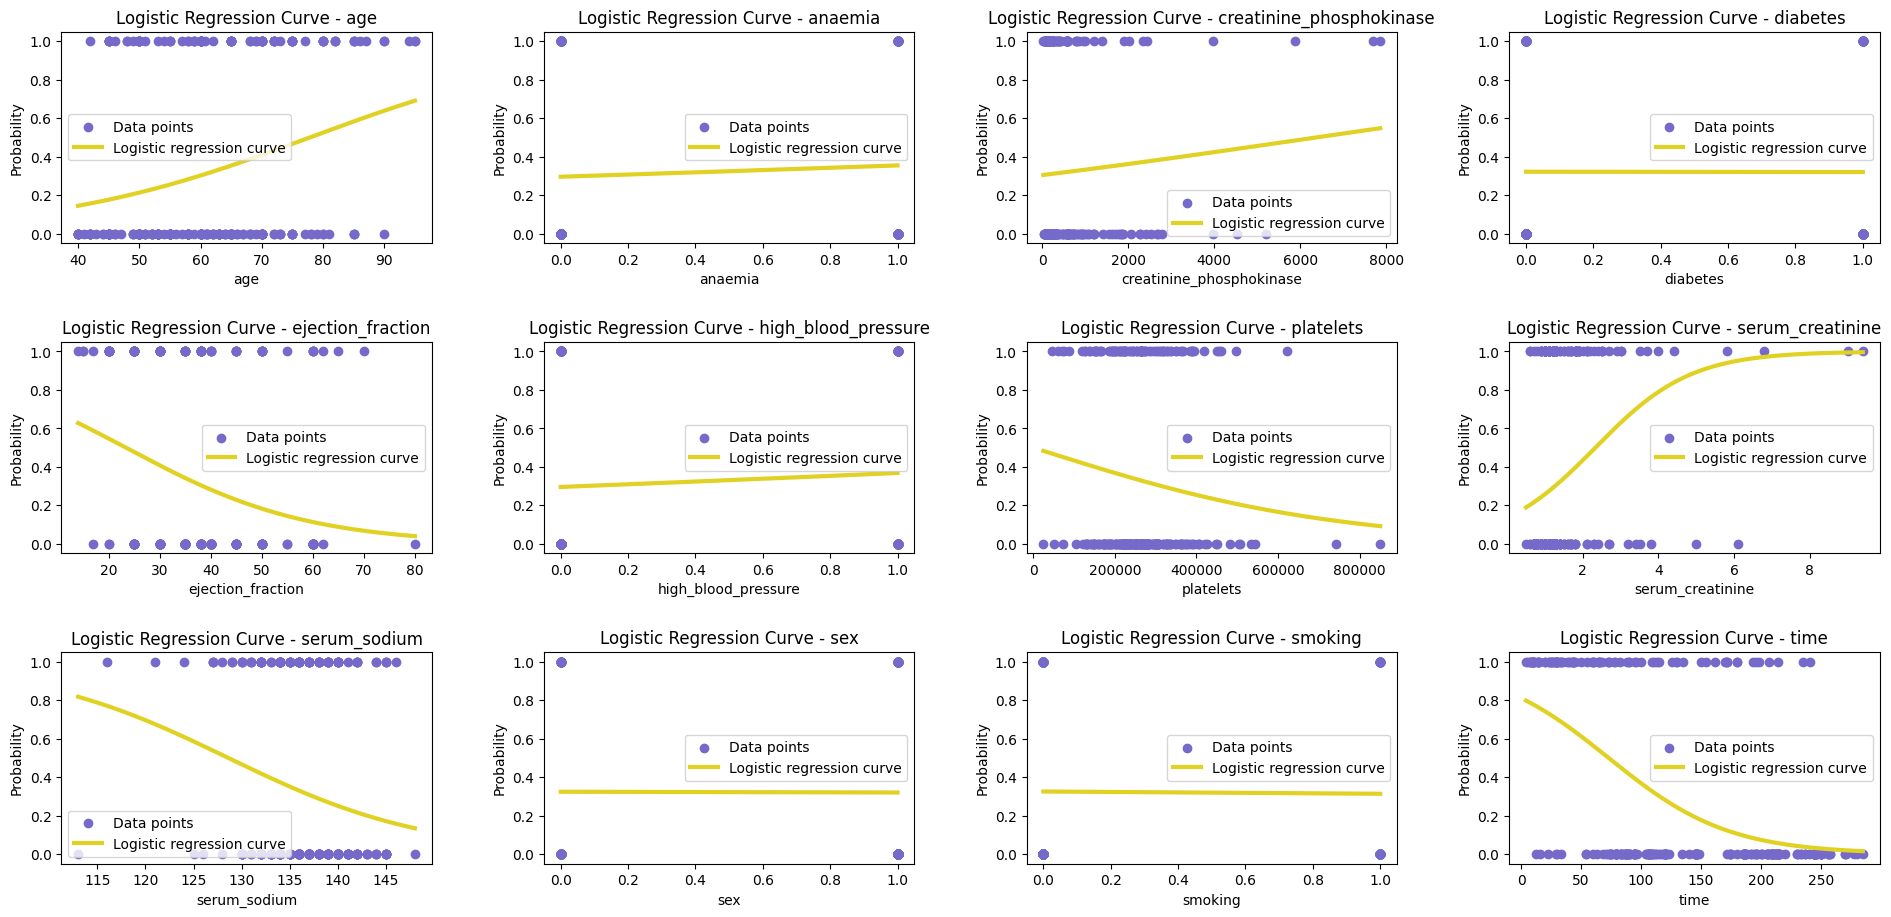

In [ ]:
# Create logistic regression object
log_reg = LogisticRegression()

fig, axs = plt.subplots(3, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

for i, feature in enumerate(data.columns[:-1]):  # Exclude 'Outcome' column
    row = i // 4  # Determine row index
    col = i % 4   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = data[[feature]]
    y = data['DEATH_EVENT']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()

**Logistic Regression Model Summary**

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats  # Import the stats module


# Separate features and target variable
X = df2.drop('DEATH_EVENT', axis=1)
y = df2['DEATH_EVENT']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get the coefficients (log-odds) and standard errors
coef = log_reg.params
se = log_reg.bse

# Calculate odds ratios by exponentiating the coefficients
odds_ratios = np.exp(coef)

# Calculate the critical value for a 95% confidence interval (Z value)
confidence_level = 0.95
z_value = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the confidence intervals for the odds ratios
ci_lower = np.exp(coef - z_value * se)
ci_upper = np.exp(coef + z_value * se)

# Create a DataFrame to display the coefficients, odds ratios, and CIs
result_df = pd.DataFrame({'Coefficient (log-odds)': coef, 'Odds Ratio (OR)': odds_ratios, 'CI Lower': ci_lower, 'CI Upper': ci_upper})

# Get summary report for logistic regression model
summary = log_reg.summary()

# Print both the summary and the odds ratios with CIs
print(summary)
print("\nOdds Ratios and CIs:")
print(result_df)



Optimization terminated successfully.
         Current function value: 0.367147
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           12
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.4151
Time:                        20:41:51   Log-Likelihood:                -109.78
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.771e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.1849      5.657      1.801      0.072      -0.902

In [77]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats  # Import the stats module


# Separate features and target variable
X = df2.drop('DEATH_EVENT', axis=1)
y = df2['DEATH_EVENT']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Calculate odds ratios by exponentiating the coefficients
odds_ratios = np.exp(coef)

# Calculate the critical value for a 95% confidence interval (Z value)
confidence_level = 0.95
z_value = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the confidence intervals for the odds ratios
ci_lower = np.exp(coef - z_value * se)
ci_upper = np.exp(coef + z_value * se)

# Create a DataFrame to display the coefficients, odds ratios, and CIs
result_df = pd.DataFrame({'Odds Ratio (OR)': odds_ratios, 'CI Lower': ci_lower, 'CI Upper': ci_upper})

# Get summary report for logistic regression model
summary = log_reg.summary()

# Print both the summary and the odds ratios with CIs
print(summary)
print("\nOdds Ratios and CIs:")
print(result_df)

Optimization terminated successfully.
         Current function value: 0.367147
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           12
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.4151
Time:                        21:08:57   Log-Likelihood:                -109.78
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.771e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.1849      5.657      1.801      0.072      -0.902